Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [72]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [ ]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [129]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("train")
data_dir_test = pathlib.Path('test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [11]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [12]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [13]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

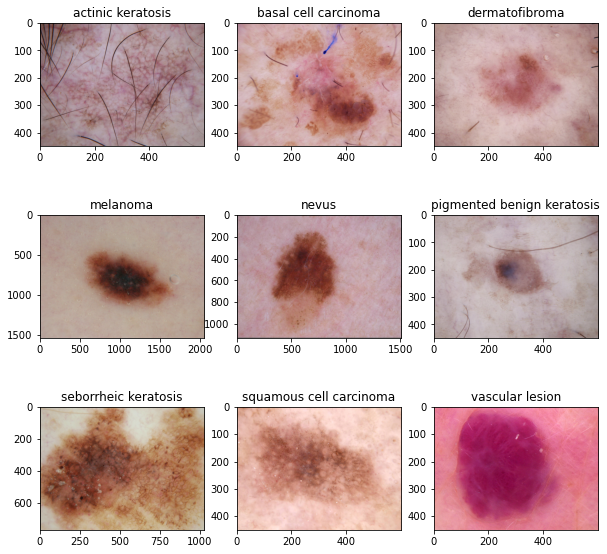

In [125]:
### your code goes here, you can use training or validation data to visualize
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
    plt.title(class_names[i])
    plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [18]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model-1
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [73]:
### Setting up a initial structure to incrementally build models later
num_class = 9
model = Sequential([
    layers.experimental.preprocessing.Rescaling(scale = 1./255, input_shape = (img_height,img_width,3))])
model.add(Conv2D(16,(5,5),padding='same',activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(16,(5,5),padding='same',activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(num_class,activation='softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [74]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [75]:
# View the summary of all layers
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_11 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_23 (Conv2D)          (None, 180, 180, 16)      1216      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 90, 90, 16)        6416      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 45, 45, 16)       0         
 g2D)                                                            
                                                                 
 flatten_17 (Flatten)        (None, 32400)           

### Train the model

In [77]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
    batch_size=batch_size
)

Epoch 1/20
56/56 [==============================] - 54s 969ms/step - loss: 1.9900 - accuracy: 0.2623 - val_loss: 1.8424 - val_accuracy: 0.3468
Epoch 2/20
56/56 [==============================] - 54s 960ms/step - loss: 1.7873 - accuracy: 0.3705 - val_loss: 1.7243 - val_accuracy: 0.3624
Epoch 3/20
56/56 [==============================] - 48s 864ms/step - loss: 1.6009 - accuracy: 0.4509 - val_loss: 1.7123 - val_accuracy: 0.4004
Epoch 4/20
56/56 [==============================] - 36s 639ms/step - loss: 1.4434 - accuracy: 0.4989 - val_loss: 1.4162 - val_accuracy: 0.5481
Epoch 5/20
56/56 [==============================] - 36s 638ms/step - loss: 1.3359 - accuracy: 0.5469 - val_loss: 1.4178 - val_accuracy: 0.5347
Epoch 6/20
56/56 [==============================] - 35s 633ms/step - loss: 1.2420 - accuracy: 0.5586 - val_loss: 1.4777 - val_accuracy: 0.5123
Epoch 7/20
56/56 [==============================] - 36s 641ms/step - loss: 1.2678 - accuracy: 0.5592 - val_loss: 1.6061 - val_accuracy: 0.5056

### Visualizing training results

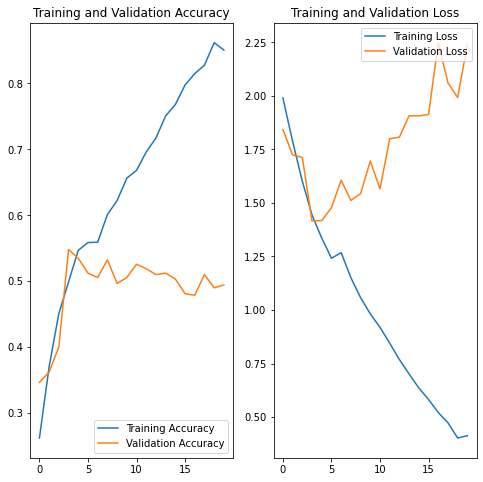

In [78]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Write your findings here :
#### Clearly the above fit is overfit (Train Accuracy > Test Accuracy)
#### There are multiple reasons for an overfit: Less amount of train data, Class Imbalance, No Data Augmentation, No Drop Outs

In [83]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 

# Your code goes here
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

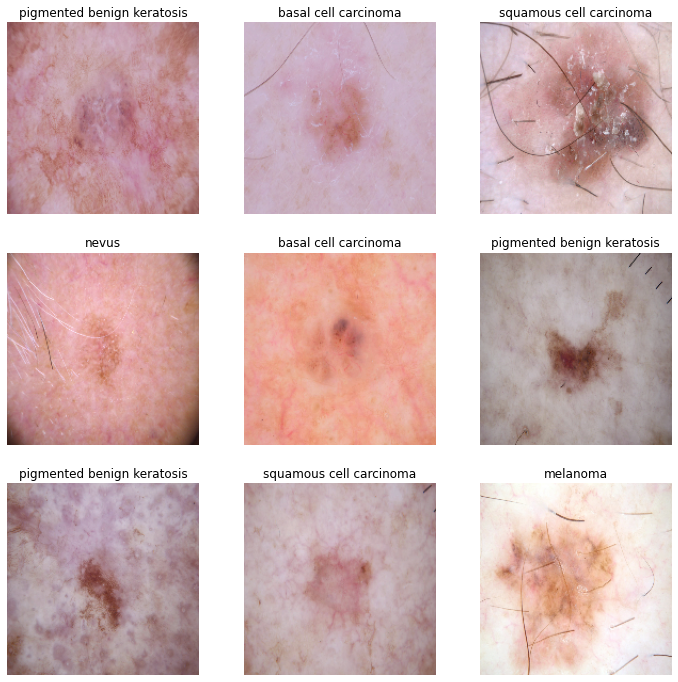

In [132]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augmentation(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [116]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
num_class = 9
model_m2 = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(scale = 1./255, input_shape = (img_height,img_width,3))])
model_m2.add(Conv2D(16,(5,5),padding='same',activation= 'relu'))
model_m2.add(MaxPool2D(pool_size=(2,2)))
model_m2.add(Conv2D(16,(5,5),padding='same',activation= 'relu'))
model_m2.add(MaxPool2D(pool_size=(2,2)))
model_m2.add(Flatten())
model_m2.add(Dense(128,activation='relu'))
model_m2.add(Dense(num_class,activation='softmax'))

### Compiling the model

In [121]:
## Your code goes here
model_m2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [118]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model_m2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
    batch_size=batch_size
)

Epoch 1/20
56/56 [==============================] - 41s 723ms/step - loss: 2.2484 - accuracy: 0.2009 - val_loss: 2.0637 - val_accuracy: 0.1991
Epoch 2/20
56/56 [==============================] - 41s 725ms/step - loss: 1.9874 - accuracy: 0.2690 - val_loss: 2.0247 - val_accuracy: 0.2371
Epoch 3/20
56/56 [==============================] - 40s 724ms/step - loss: 1.9444 - accuracy: 0.2768 - val_loss: 1.7363 - val_accuracy: 0.3893
Epoch 4/20
56/56 [==============================] - 41s 725ms/step - loss: 1.7501 - accuracy: 0.3705 - val_loss: 1.8501 - val_accuracy: 0.3289
Epoch 5/20
56/56 [==============================] - 40s 717ms/step - loss: 1.6729 - accuracy: 0.4018 - val_loss: 1.7490 - val_accuracy: 0.4049
Epoch 6/20
56/56 [==============================] - 40s 714ms/step - loss: 1.5839 - accuracy: 0.4280 - val_loss: 1.5254 - val_accuracy: 0.4922
Epoch 7/20
56/56 [==============================] - 40s 712ms/step - loss: 1.4996 - accuracy: 0.4749 - val_loss: 1.4804 - val_accuracy: 0.4899

### Visualizing the results

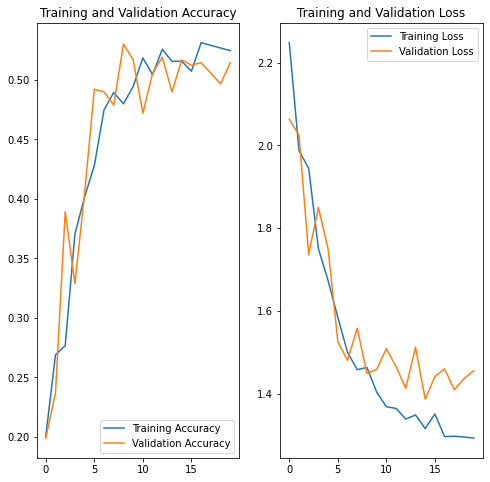

In [119]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [120]:
model_m2.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_14 (Sequential)  multiple                  0         
                                                                 
 rescaling_17 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_33 (Conv2D)          (None, 180, 180, 16)      1216      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 90, 90, 16)        6416      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 45, 45, 16)       0         
 g2D)                                                

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?
After using the data augmentation, the overfitting improved but still the accuracies are low for train and validation datasets

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [135]:
path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,train\actinic keratosis\ISIC_0025780.jpg,actinic keratosis
1,train\actinic keratosis\ISIC_0025803.jpg,actinic keratosis
2,train\actinic keratosis\ISIC_0025825.jpg,actinic keratosis
3,train\actinic keratosis\ISIC_0025953.jpg,actinic keratosis
4,train\actinic keratosis\ISIC_0025957.jpg,actinic keratosis
...,...,...
2234,train\vascular lesion\ISIC_0033844.jpg,vascular lesion
2235,train\vascular lesion\ISIC_0033969.jpg,vascular lesion
2236,train\vascular lesion\ISIC_0033991.jpg,vascular lesion
2237,train\vascular lesion\ISIC_0034196.jpg,vascular lesion


In [136]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,train\actinic keratosis\ISIC_0025780.jpg,actinic keratosis
1,train\actinic keratosis\ISIC_0025803.jpg,actinic keratosis
2,train\actinic keratosis\ISIC_0025825.jpg,actinic keratosis
3,train\actinic keratosis\ISIC_0025953.jpg,actinic keratosis
4,train\actinic keratosis\ISIC_0025957.jpg,actinic keratosis
...,...,...
2234,train\vascular lesion\ISIC_0033844.jpg,vascular lesion
2235,train\vascular lesion\ISIC_0033969.jpg,vascular lesion
2236,train\vascular lesion\ISIC_0033991.jpg,vascular lesion
2237,train\vascular lesion\ISIC_0034196.jpg,vascular lesion


<BarContainer object of 9 artists>

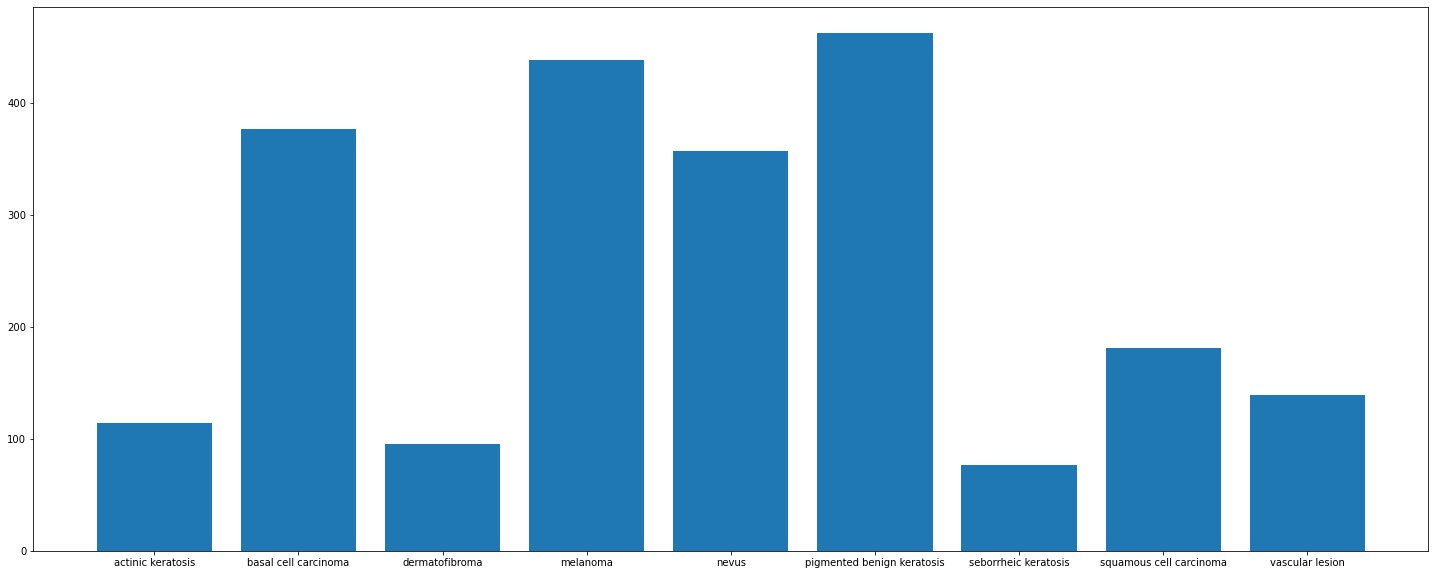

In [134]:
num_classes = 9
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples? 
Seborrheic Keratosis has the least number of samples
#### - Which classes dominate the data in terms proportionate number of samples?
Melanoma and Pigmented benign keratosis dominate in terms of proportionate number of samples

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [166]:
from pathlib import Path
path_to_training_dataset=data_dir_train
import Augmentor
for i in class_names:
    csp = str(Path(path_to_training_dataset))
    p = Augmentor.Pipeline(csp + "/" + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x23EE487BD00>: 100%|█| 500/500 [00:07<00:00, 63.94 Samples/


Initialised with 376 image(s) found.
Output directory set to train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x23EF55434F0>: 100%|█| 500/500 [00:06<00:00, 72.45 Samples/


Initialised with 95 image(s) found.
Output directory set to train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x23EE48FC220>: 100%|█| 500/500 [00:07<00:00, 67.43 Samples/


Initialised with 438 image(s) found.
Output directory set to train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x23EDD1B0B50>: 100%|█| 500/500 [00:43<00:00, 11.41 Samples


Initialised with 357 image(s) found.
Output directory set to train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x23EDD20CD00>: 100%|█| 500/500 [00:44<00:00, 11.31 Samples/


Initialised with 462 image(s) found.
Output directory set to train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x23EF52DDCD0>: 100%|█| 500/500 [00:07<00:00, 66.09 Samples/


Initialised with 77 image(s) found.
Output directory set to train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x23EDDA118B0>: 100%|█| 500/500 [00:19<00:00, 26.05 Samples


Initialised with 181 image(s) found.
Output directory set to train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x23EDD244C70>: 100%|█| 500/500 [00:07<00:00, 69.78 Samples/


Initialised with 139 image(s) found.
Output directory set to train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x23EDD3A6340>: 100%|█| 500/500 [00:07<00:00, 67.02 Samples/


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [167]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [168]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_02888ded-4744-4b46-8e7f-39ce434dc48c.jpg',
 'train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_1485a303-8123-4e23-baf4-ba8b11bad8ab.jpg',
 'train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_4219824c-a95a-4504-bfad-be42eab51a4f.jpg',
 'train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_efeed812-7b58-40c9-91b1-8be528b92994.jpg',
 'train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_06dacda6-1107-410a-aaee-0ba805083195.jpg',
 'train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_55758a35-8870-4dae-b852-0618c37cf464.jpg',
 'train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_aefcdfd7-6d7a-41ce-8d49-dd64d9277358.jpg',
 'train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_d6f9d3ae-d610-4b9a-843d-26790fff9a51.jpg',
 'train\\actinic

In [169]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [170]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [171]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

### Lets see the distribution of augmented data after adding new images to the original training data.

In [172]:
new_df['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [152]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [173]:
data_dir_train_new=data_dir_train
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train_new,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [174]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [183]:
## your code goes here
num_class = 9
model_m3 = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(scale = 1./255, input_shape = (img_height,img_width,3))])
model_m3.add(Conv2D(16,(5,5),padding='same',activation= 'relu'))
model_m3.add(MaxPool2D(pool_size=(2,2)))
model_m3.add(Conv2D(16,(5,5),padding='same',activation= 'relu'))
model_m3.add(MaxPool2D(pool_size=(2,2)))
model_m3.add(Flatten())
model_m3.add(Dense(128,activation='relu'))
model_m3.add(Dense(num_class,activation='softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [184]:
## your code goes here
model_m3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [185]:
epochs = 30
history = model_m3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
    batch_size=batch_size
)

Epoch 1/30
169/169 [==============================] - 185s 1s/step - loss: 2.2050 - accuracy: 0.1665 - val_loss: 2.1747 - val_accuracy: 0.2450
Epoch 2/30
169/169 [==============================] - 183s 1s/step - loss: 1.7698 - accuracy: 0.3351 - val_loss: 1.9732 - val_accuracy: 0.2457
Epoch 3/30
169/169 [==============================] - 183s 1s/step - loss: 1.6304 - accuracy: 0.3761 - val_loss: 1.4838 - val_accuracy: 0.4402
Epoch 4/30
169/169 [==============================] - 184s 1s/step - loss: 1.5012 - accuracy: 0.4217 - val_loss: 1.3693 - val_accuracy: 0.4744
Epoch 5/30
169/169 [==============================] - 183s 1s/step - loss: 1.4202 - accuracy: 0.4460 - val_loss: 1.3858 - val_accuracy: 0.4751
Epoch 6/30
169/169 [==============================] - 182s 1s/step - loss: 1.3904 - accuracy: 0.4497 - val_loss: 1.3325 - val_accuracy: 0.4892
Epoch 7/30
169/169 [==============================] - 184s 1s/step - loss: 1.3856 - accuracy: 0.4611 - val_loss: 1.3495 - val_accuracy: 0.4885

In [186]:
model_m3.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_14 (Sequential)  multiple                  0         
                                                                 
 rescaling_20 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_39 (Conv2D)          (None, 180, 180, 16)      1216      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 90, 90, 16)        6416      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 45, 45, 16)       0         
 g2D)                                                

#### **Todo:**  Visualize the model results

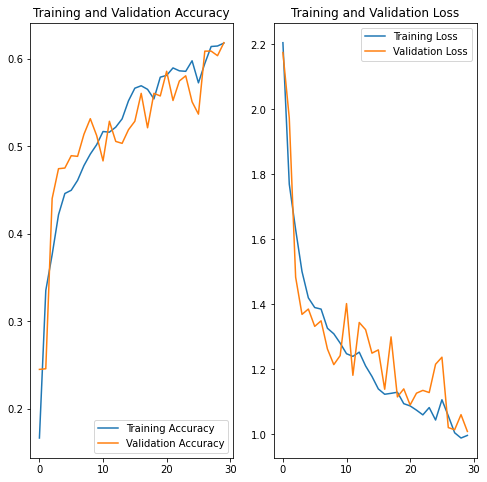

In [187]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



Treating the class imbalance did help increase the error and with the help of data augmentation was able to overcome the overfitting issue, with a lot of parameters in hand while building a CNN model, once can achieve better accuracies
Just to summarise the entire process that was carried out,
Set out the initial structure with the right optimisers and loss function so that, we dont have to tweak that whenever we made a big change
After the first iteration, we observed that the model was overfitting, hence needed data augmentation
In the second itertion, when simple data augmentation was applied, overfitting reduced with reduction in accuracy
On further investigation realised that the dataset is class imbalanced, with the help of the Augmentor library added 500 images to each class to make it a balanced class distribution, upon doing this, the model still did not overfit but accuracies went up, with more tweaking of hyperparameters we are confident we will be resulting in a better model, but due to interest of time and submission deadlines, finalizing the exercise with the above learnings